In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df_original = pd.read_csv('/content/drive/MyDrive/학술제/DF.csv')
df = df_original.iloc[:700000,:]
df_final_test = df_original.iloc[700000:,:]
print(df.shape, df_final_test.shape)

(700000, 24) (306171, 24)


In [4]:
# X와 y데이터 분할
X = df.drop(['usage', 'Trip', 'Route_Area', 'Date', 'Weather'], axis = 1)
y = df['usage']
y_save = y

# 데이터 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X) # 일단 모든 항목을 표준화해버리기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [8]:
# RNN 모델 구성
model = Sequential()
model.add(SimpleRNN(units=100, activation='linear', input_shape=(19, 1), return_sequences=True))
model.add(SimpleRNN(units=100, activation='linear', return_sequences=True))
model.add(SimpleRNN(units=100, activation='linear', return_sequences=True))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 19, 100)           10200     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 19, 100)           20100     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 19, 100)           20100     
                                                                 
 dense (Dense)               (None, 19, 1)             101       
                                                                 
Total params: 50501 (197.27 KB)
Trainable params: 50501 (197.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=10, batch_size=100)

Epoch 1/10
7000/7000 [==============================] - 112s 16ms/step - loss: 0.0562
Epoch 2/10
7000/7000 [==============================] - 118s 17ms/step - loss: 0.0562
Epoch 3/10
7000/7000 [==============================] - 112s 16ms/step - loss: 0.0560
Epoch 4/10
7000/7000 [==============================] - 114s 16ms/step - loss: 0.0560
Epoch 5/10
7000/7000 [==============================] - 112s 16ms/step - loss: 0.0560
Epoch 6/10
7000/7000 [==============================] - 113s 16ms/step - loss: 0.0559
Epoch 7/10
7000/7000 [==============================] - 115s 16ms/step - loss: 0.0559
Epoch 8/10
7000/7000 [==============================] - 118s 17ms/step - loss: 0.0559
Epoch 9/10
7000/7000 [==============================] - 122s 17ms/step - loss: 0.0559
Epoch 10/10
7000/7000 [==============================] - 117s 17ms/step - loss: 0.0559


In [12]:
model.save('./rnn_model.keras')

In [5]:
from keras.models import load_model
loaded_model = load_model("/content/rnn_model.keras")

In [13]:
predict = model.predict(X)

21875/21875 [==============================] - 164s 7ms/step


In [6]:
predict[:, -1, :]

NameError: ignored

In [15]:
predict.shape[0]

700000

In [16]:
import random

def sample_maker(n, save = True, name = 'sample_chart'):
    for i in range(n):
        plt.figure(figsize=(12,6), dpi = 300)
        plt.plot(np.arange(predict.shape[0]), y, color = 'red', label = 'TRUE POINT')
        plt.plot(np.arange(predict.shape[0]), predict[:, -1, :], color = 'blue', label = 'PREDICT POINT')
        s = random.randint(0, predict.shape[0] - 8000)
        plt.xlim(s, s + 8000)
        plt.ylim(-0.5, 0.5)
        plt.legend()
        if save == True:
            plt.savefig(f'./chart_sample/{name}_{i}')
        else:
            plt.show()

sample_maker(20, save = False)

Output hidden; open in https://colab.research.google.com to view.

# 2차 테스트

In [8]:
df_final_test

X = df_final_test.drop(['usage', 'Trip', 'Route_Area', 'Date', 'Weather'], axis = 1)
y = df_final_test['usage']
y_save = y

# 데이터 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X) # 일단 모든 항목을 표준화해버리기

X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
predict = model.predict(X)

NameError: ignored

FileNotFoundError: ignored

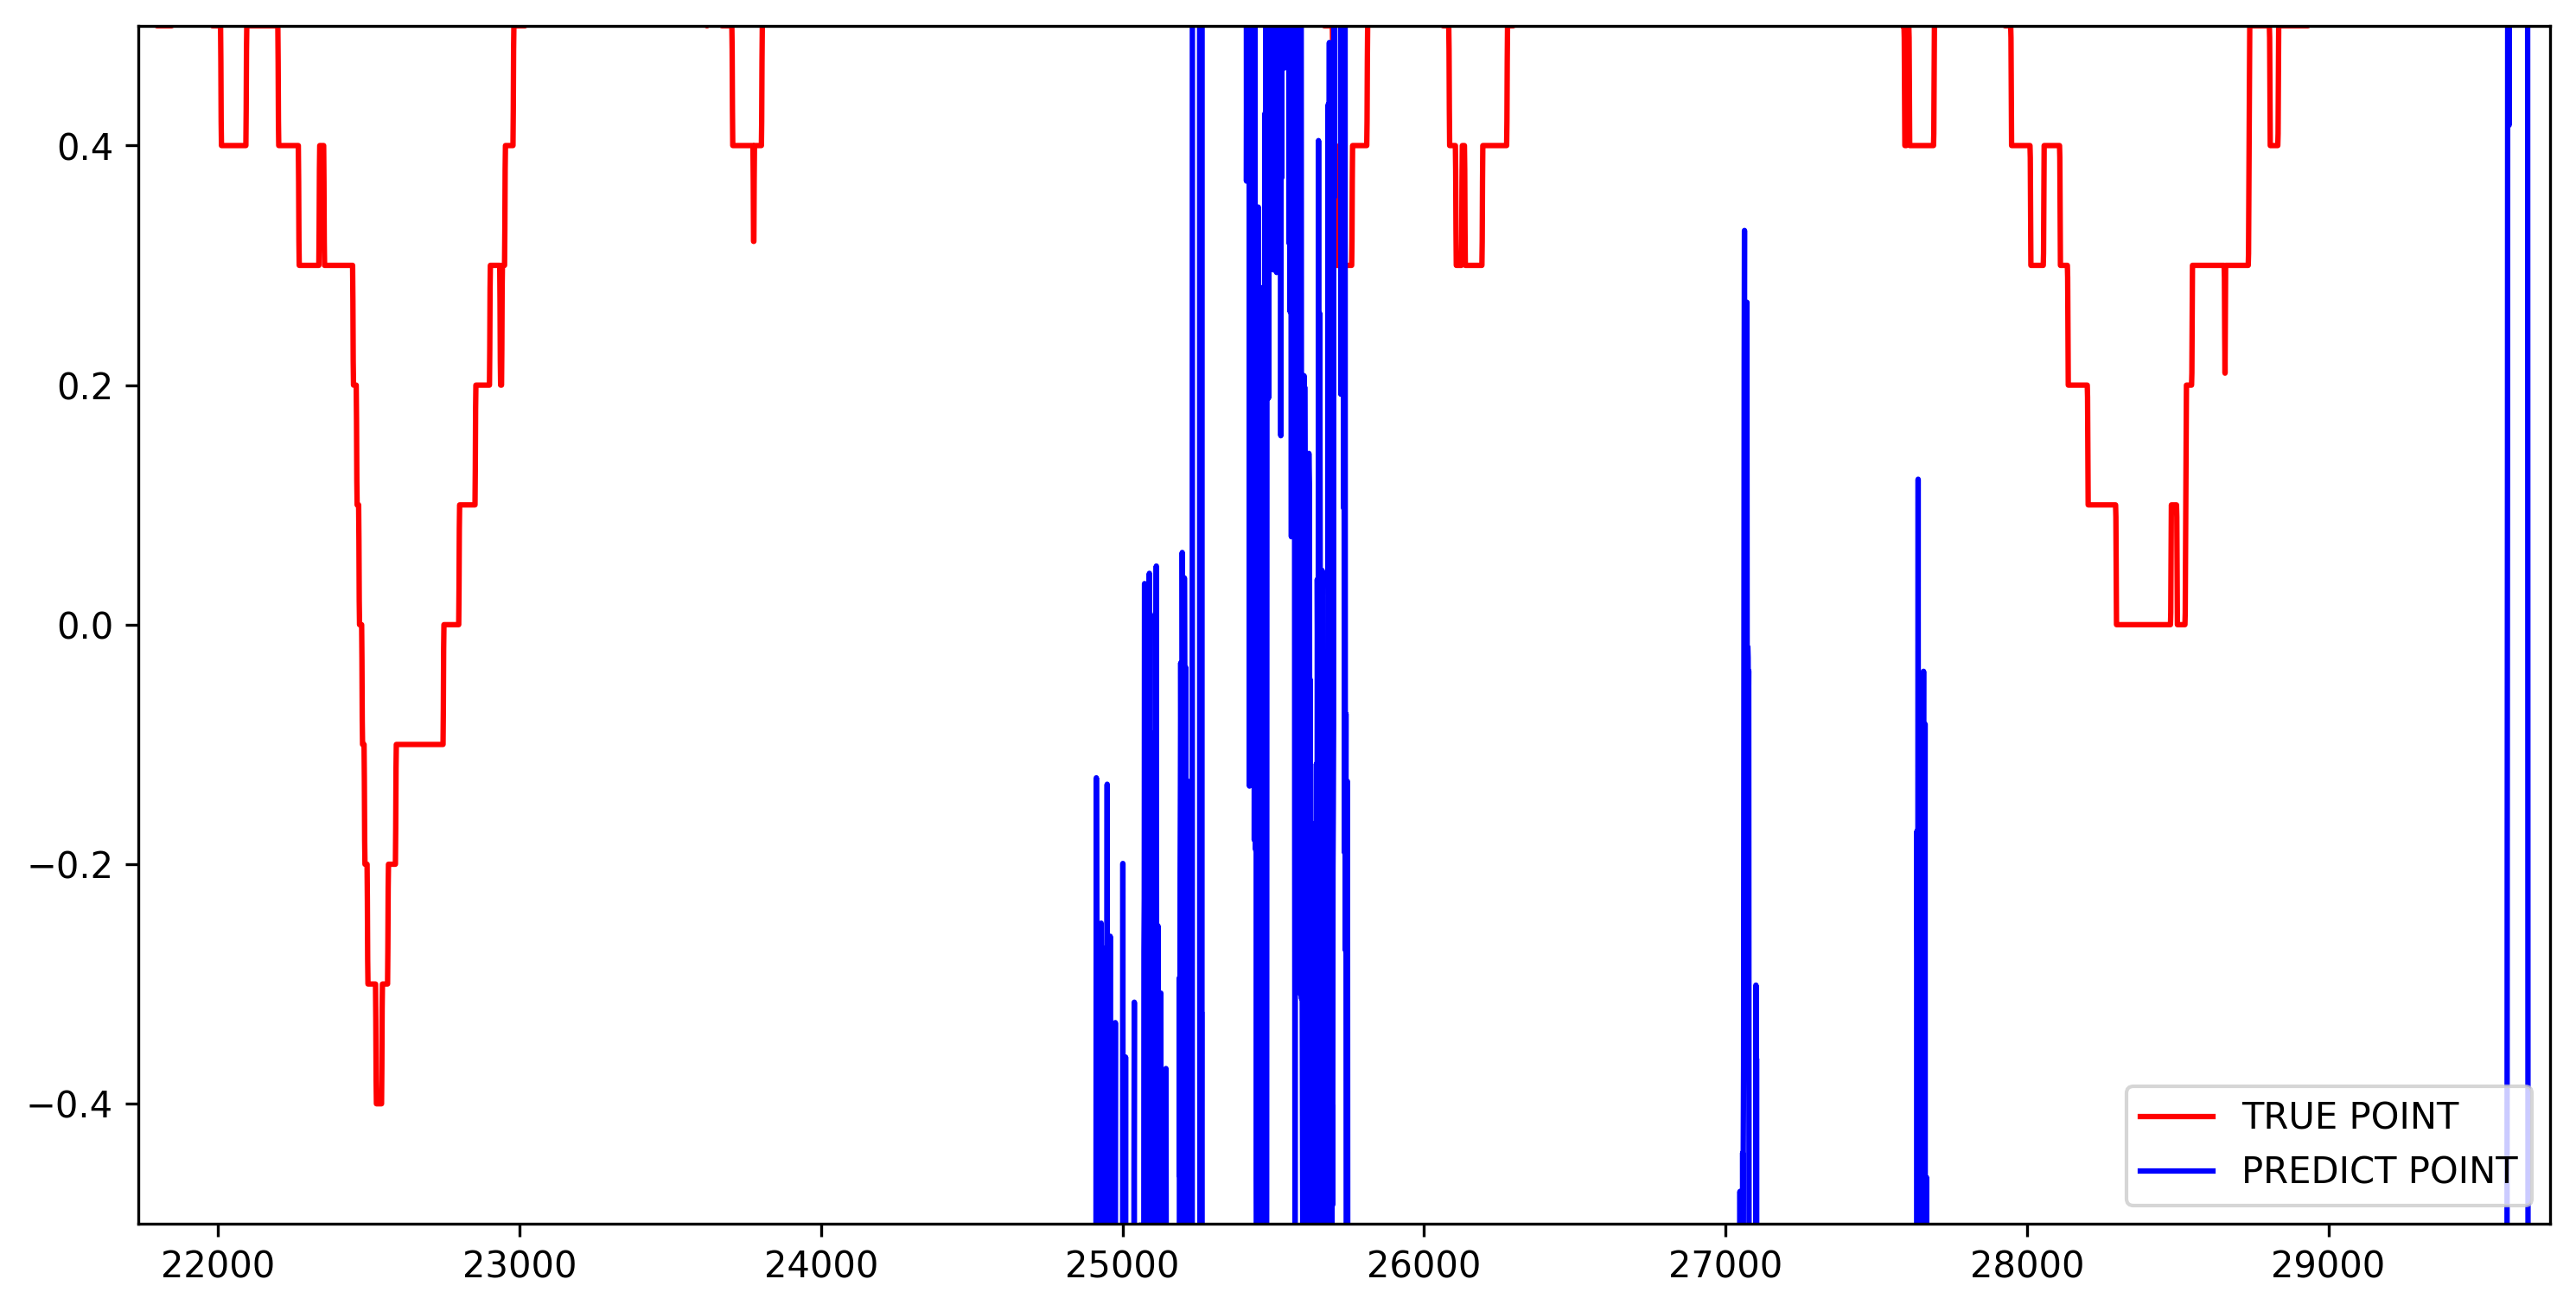

In [19]:
sample_maker(16, save = True, name = 'test_chart')

In [20]:
#현재 배터리 용량
SoC = df_final_test['SoC [%]'].values
SoC

array([53. , 53. , 53. , ..., 68.3, 68.3, 68.3])

In [ ]:
efficiency= 0.9  # 배터리 이동 효율성

predicted_distance = (SoC * efficiency) - predict
print("예측된 주행 가능 거리:", predicted_distance)